In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Data processing
Dataset obtained from this blogpost.
https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc

In [2]:
df = pd.read_csv('iris-data.csv')

In [3]:
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,100.000000,100.000000,100.000000,95.000000
mean,5.193940,3.095000,2.862000,0.816842
std,1.334795,0.475326,1.448565,0.563170
min,0.055000,2.000000,1.000000,0.100000
25%,4.975000,2.800000,1.500000,0.200000
50%,5.400000,3.050000,2.450000,1.000000
75%,5.800000,3.400000,4.325000,1.300000
max,7.000000,4.400000,5.100000,1.800000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  100 non-null    float64
 1   sepal_width_cm   100 non-null    float64
 2   petal_length_cm  100 non-null    float64
 3   petal_width_cm   95 non-null     float64
 4   class            100 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.0+ KB


In [6]:
#Removing all null values row
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 0 to 99
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  95 non-null     float64
 1   sepal_width_cm   95 non-null     float64
 2   petal_length_cm  95 non-null     float64
 3   petal_width_cm   95 non-null     float64
 4   class            95 non-null     object 
dtypes: float64(4), object(1)
memory usage: 4.5+ KB


In [7]:
df['class'].replace(["Iris-setosa","Iris-versicolor"], [1,0], inplace=True)

In [8]:
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


## Now dividing the dataset
- First in input data (X) and output data (y) 
- Then dividing training and test data (No validation, but why?) 
- Also added an extra column with all 1's. (Why)

In [9]:
inp_df = df.drop(df.columns[[4]], axis=1)
out_df = df.drop(df.columns[[0,1,2,3]], axis=1)

#
scaler = StandardScaler()
inp_df = scaler.fit_transform(inp_df)

# Adding an extra column to be compatible with bias
new_c = (np.zeros(shape=(inp_df.shape[0],1)) + 1)
inp_df = np.concatenate((inp_df, new_c), axis=1)

#
X_train, X_test, y_train, y_test = train_test_split(inp_df, out_df, test_size=0.2, random_state=42)

In [10]:
X_train[:5]

array([[ 0.65540611, -0.59375803,  0.73869892,  0.86247727,  1.        ],
       [ 0.14025935,  0.65973115, -0.85464475, -1.10111477,  1.        ],
       [ 0.58181371, -0.59375803,  1.50073285,  1.39800238,  1.        ],
       [ 0.14025935, -0.17592831,  1.08507798,  1.21949401,  1.        ],
       [-0.15411022,  0.24190142, -1.20102381, -1.10111477,  1.        ]])

In [11]:
y_train[:5]

,class
71,0
20,1
83,0
84,0
35,1


# Logistic Regression
## Model Equation

$$y = \frac{1}{1+e^{-\sum{w_i x_i}}}$$


## Binary cross entropy loss

$$loss = - \frac{1}{N} \sum_{i=1}^N y \log{\hat{y}} + (1-y) \log{(1-\hat{y})}$$

# Derivative of sigmoid loss funtion for logistic regression
https://medium.com/@andrewdaviesul/chain-rule-differentiation-log-loss-function-d79f223eae5
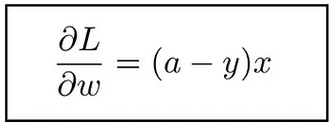

In [12]:
def model(X, W): # W is an array of weights
    # Logistic regression model implementation
    y = np.zeros(shape=(X.shape[0], 1))
    y = np.expand_dims(y, axis=1)
    
    return y

In [13]:
def loss_bce(y_true, y_pred, W):
    # Binary cross entropy loss
    loss = 0
    
    return loss

In [14]:
def fit(num_weights, epoch=10, lr = 1):
    # Initialization
    W = np.zeros(num_weights)
    
    # Epochs start
    for e in range(1, epoch+1):           
        y_pred = model(X_train, W)
        print(e, ". Loss: ", loss_bce(y_train, y_pred, W), ", W: ", W)
        
        for i in range(W.shape[0]):
            # Calculate derivative against parameters [Implement yourself]
            x_i = 0
            dw_i = 0
            
            # Update parameters [Implement yourself]
            W[i] = 0
        
        # Plot the lines
        # Y_hat = w * X + b
        # plt.plot(X, Y_hat, label="Epoch: "+str(i))
    
    # plt.scatter(X, Y, label="dataset")
    # plt.legend()
    # plt.show()
    
    return W

In [15]:
W = fit(5)

1 . Loss:  0 , W:  [0. 0. 0. 0. 0.]
2 . Loss:  0 , W:  [0. 0. 0. 0. 0.]
3 . Loss:  0 , W:  [0. 0. 0. 0. 0.]
4 . Loss:  0 , W:  [0. 0. 0. 0. 0.]
5 . Loss:  0 , W:  [0. 0. 0. 0. 0.]
6 . Loss:  0 , W:  [0. 0. 0. 0. 0.]
7 . Loss:  0 , W:  [0. 0. 0. 0. 0.]
8 . Loss:  0 , W:  [0. 0. 0. 0. 0.]
9 . Loss:  0 , W:  [0. 0. 0. 0. 0.]
10 . Loss:  0 , W:  [0. 0. 0. 0. 0.]
